In [295]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [296]:
our_path = 'Case 2 Data 2024.csv'
df = pd.read_csv(our_path)
df.head()
df.shape

(2520, 7)

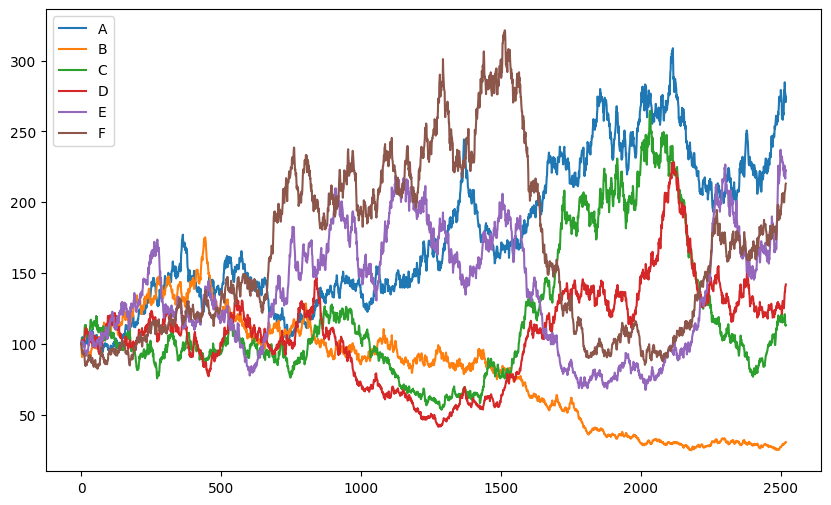

In [297]:
plt.figure(figsize=(10, 6))
df.set_index(df.columns[0], inplace=True)
for column in df.columns[:]:
    plt.plot(df.index, df[column], label=column)

plt.legend()
plt.show()

In [298]:
pairwise_covariance = df.cov()
print(pairwise_covariance)

             A            B            C            D            E  \
A  2680.229547 -1660.082352  1686.350130   989.271764  -627.089011   
B -1660.082352  1412.492842 -1068.138149  -663.953415   204.066068   
C  1686.350130 -1068.138149  2312.867092  1268.103219 -1358.988677   
D   989.271764  -663.953415  1268.103219  1204.708606  -767.945027   
E  -627.089011   204.066068 -1358.988677  -767.945027  1705.220034   
F  -555.122024   167.354386 -1715.589257 -1373.845111  1877.101792   

             F  
A  -555.122024  
B   167.354386  
C -1715.589257  
D -1373.845111  
E  1877.101792  
F  3598.145983  


In [299]:
# Calculate the returns for each stock price column
returns_df = df.pct_change()

# Add the calculated returns as new columns to the original DataFrame
for column in df.columns:
    df[f'{column}_returns'] = returns_df[column]
    
df.head()

,A,B,C,D,E,F,A_returns,B_returns,C_returns,D_returns,E_returns,F_returns
Unnamed: 0,,,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,101.804962,95.006117,100.620233,101.093750,100.232262,97.859860,0.018050,-0.049939,0.006202,0.010938,0.002323,-0.021401
2,104.326358,91.632940,101.798739,102.185390,100.689872,94.990233,0.024767,-0.035505,0.011712,0.010798,0.004565,-0.029324
3,104.509559,90.577894,103.731466,101.599475,99.583998,93.790650,0.001756,-0.011514,0.018986,-0.005734,-0.010983,-0.012628
4,104.750542,92.571924,102.430303,102.856094,101.847549,95.003278,0.002306,0.022015,-0.012544,0.012368,0.022730,0.012929


In [300]:
# Drop any rows with NaN values (first row will have NaN return)
df.dropna(inplace=True)

# Optional: You can align the indexes if necessary
df.reset_index(drop=True, inplace=True)
df.head()

,A,B,C,D,E,F,A_returns,B_returns,C_returns,D_returns,E_returns,F_returns
0,101.804962,95.006117,100.620233,101.093750,100.232262,97.859860,0.018050,-0.049939,0.006202,0.010938,0.002323,-0.021401
1,104.326358,91.632940,101.798739,102.185390,100.689872,94.990233,0.024767,-0.035505,0.011712,0.010798,0.004565,-0.029324
2,104.509559,90.577894,103.731466,101.599475,99.583998,93.790650,0.001756,-0.011514,0.018986,-0.005734,-0.010983,-0.012628
3,104.750542,92.571924,102.430303,102.856094,101.847549,95.003278,0.002306,0.022015,-0.012544,0.012368,0.022730,0.012929
4,104.480121,93.035038,101.349544,102.150440,100.488953,93.364075,-0.002582,0.005003,-0.010551,-0.006861,-0.013340,-0.017254


In [301]:
window_size = 21  # Assuming 1 month with 21 trading days

# Calculate the moving averages for each return column
for window_size in [3, 7, 21, 63, 126, 252]:
    for column in ['A_returns', 'B_returns', 'C_returns', 'D_returns', 'E_returns', 'F_returns']:
        df[f'{column}_MA_{window_size}'] = df[column].rolling(window=window_size).mean()
        df[f'{column}_EMA_{window_size}'] = df[column].ewm(span=window_size, adjust=False).mean()

# Drop rows with NaN values resulting from the rolling window calculation
df.dropna(inplace=True)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)


In [302]:
df.head()



,A,B,C,D,E,F,A_returns,B_returns,C_returns,D_returns,...,B_returns_MA_252,B_returns_EMA_252,C_returns_MA_252,C_returns_EMA_252,D_returns_MA_252,D_returns_EMA_252,E_returns_MA_252,E_returns_EMA_252,F_returns_MA_252,F_returns_EMA_252
0,142.909143,130.306869,95.852593,120.652503,165.813991,113.867729,-0.004548,0.020756,-0.018519,-0.021673,...,0.001192,-0.005754,0.000030,0.000767,0.000900,0.002647,0.002209,0.002918,0.000680,-0.001563
1,143.933114,129.461367,95.295052,122.055061,160.367022,114.439991,0.007165,-0.006489,-0.005817,0.011625,...,0.001365,-0.005760,-0.000017,0.000715,0.000903,0.002718,0.002069,0.002635,0.000785,-0.001511
2,140.662842,131.846797,94.493466,120.721900,164.816620,114.070919,-0.022721,0.018426,-0.008412,-0.010923,...,0.001579,-0.005568,-0.000097,0.000642,0.000817,0.002610,0.002161,0.002834,0.000889,-0.001525
3,141.856507,130.741232,95.896428,120.005151,163.401697,116.030698,0.008486,-0.008385,0.014847,-0.005937,...,0.001591,-0.005591,-0.000113,0.000755,0.000816,0.002543,0.002171,0.002743,0.001007,-0.001377
4,144.420129,130.155565,91.203504,117.231287,161.988100,113.964708,0.018072,-0.004480,-0.048937,-0.023115,...,0.001486,-0.005582,-0.000258,0.000362,0.000675,0.002340,0.002046,0.002653,0.000885,-0.001507


In [303]:
window_size = 21
pairwise_cov_matrix = df[['A_returns', 'B_returns', 'C_returns', 'D_returns', 'E_returns', 'F_returns']].rolling(window=window_size).cov()

pairs = [('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'A'), ('D', 'B'), ('D', 'C'), ('D', 'D'), ('D', 'E'), ('D', 'F'), ('E', 'A'), ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'E'), ('E', 'F'), ('F', 'A'), ('F', 'B'), ('F', 'C'), ('F', 'D'), ('F', 'E'), ('F', 'F')]
flattened_cov_matrix = pairwise_cov_matrix.values.reshape(-1, 36) 
flattened_cov_df = pd.DataFrame(flattened_cov_matrix, columns=[f'{pair[0]}_{pair[1]}' for pair in pairs])

flattened_cov_df.head(35)

bad_list = [('A', 'A'), ('B', 'A'), ('B', 'B'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('D', 'A'), ('D', 'B'), ('D', 'C'), ('D', 'D'), ('E', 'A'), ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'E'), ('F', 'A'), ('F', 'B'), ('F', 'C'), ('F', 'D'), ('F', 'E'), ('F', 'F')]
for pair in bad_list:
    flattened_cov_df = flattened_cov_df.drop(f"{pair[0]}_{pair[1]}", axis = 1)

flattened_cov_df.head(30)


,A_B,A_C,A_D,A_E,A_F,B_C,B_D,B_E,B_F,C_D,C_E,C_F,D_E,D_F,E_F
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
df.head(100)

,A,B,C,D,E,F,A_returns,B_returns,C_returns,D_returns,...,B_returns_MA_252,B_returns_EMA_252,C_returns_MA_252,C_returns_EMA_252,D_returns_MA_252,D_returns_EMA_252,E_returns_MA_252,E_returns_EMA_252,F_returns_MA_252,F_returns_EMA_252
0,142.909143,130.306869,95.852593,120.652503,165.813991,113.867729,-0.004548,0.020756,-0.018519,-0.021673,...,0.001192,-0.005754,0.000030,0.000767,0.000900,0.002647,0.002209,0.002918,0.000680,-0.001563
1,143.933114,129.461367,95.295052,122.055061,160.367022,114.439991,0.007165,-0.006489,-0.005817,0.011625,...,0.001365,-0.005760,-0.000017,0.000715,0.000903,0.002718,0.002069,0.002635,0.000785,-0.001511
2,140.662842,131.846797,94.493466,120.721900,164.816620,114.070919,-0.022721,0.018426,-0.008412,-0.010923,...,0.001579,-0.005568,-0.000097,0.000642,0.000817,0.002610,0.002161,0.002834,0.000889,-0.001525
3,141.856507,130.741232,95.896428,120.005151,163.401697,116.030698,0.008486,-0.008385,0.014847,-0.005937,...,0.001591,-0.005591,-0.000113,0.000755,0.000816,0.002543,0.002171,0.002743,0.001007,-0.001377
4,144.420129,130.155565,91.203504,117.231287,161.988100,113.964708,0.018072,-0.004480,-0.048937,-0.023115,...,0.001486,-0.005582,-0.000258,0.000362,0.000675,0.002340,0.002046,0.002653,0.000885,-0.001507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,150.856352,141.246746,88.330678,111.648497,129.842287,127.619074,0.015991,0.016508,-0.019132,0.008670,...,0.001228,-0.002240,-0.000722,-0.000109,-0.000114,0.000974,0.001111,0.000469,0.001608,0.000200
96,152.639747,141.783546,88.990333,109.849422,127.988285,125.458407,0.011822,0.003800,0.007468,-0.016114,...,0.001170,-0.002192,-0.000740,-0.000049,-0.000159,0.000839,0.000963,0.000353,0.001410,0.000065
97,154.077959,140.606817,88.361618,107.090765,128.872063,127.220969,0.009422,-0.008299,-0.007065,-0.025113,...,0.001135,-0.002240,-0.000771,-0.000104,-0.000274,0.000634,0.000922,0.000404,0.001383,0.000175
98,153.868031,142.025764,88.404336,107.471057,132.708497,130.453181,-0.001362,0.010092,0.000483,0.003551,...,0.001177,-0.002143,-0.000835,-0.000100,-0.000238,0.000657,0.000901,0.000636,0.001499,0.000375


In [305]:
flattened_cov_df.head(100)

,A_B,A_C,A_D,A_E,A_F,B_C,B_D,B_E,B_F,C_D,C_E,C_F,D_E,D_F,E_F
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.000117,0.000203,0.000226,-0.000217,-0.000097,-0.000212,-0.000114,0.000139,0.000050,0.000259,-0.000150,-0.000062,-0.000182,-0.000069,0.000127
96,-0.000098,0.000206,0.000230,-0.000220,-0.000103,-0.000202,-0.000131,0.000128,0.000039,0.000253,-0.000161,-0.000075,-0.000176,-0.000060,0.000141
97,-0.000099,0.000176,0.000182,-0.000203,-0.000086,-0.000198,-0.000111,0.000123,0.000031,0.000207,-0.000141,-0.000060,-0.000160,-0.000056,0.000136
98,-0.000094,0.000168,0.000176,-0.000215,-0.000102,-0.000192,-0.000107,0.000137,0.000045,0.000206,-0.000136,-0.000059,-0.000159,-0.000059,0.000154


In [306]:
combined_df = pd.concat([df,flattened_cov_df], axis = 1)
combined_df.head(100)

,A,B,C,D,E,F,A_returns,B_returns,C_returns,D_returns,...,B_C,B_D,B_E,B_F,C_D,C_E,C_F,D_E,D_F,E_F
0,142.909143,130.306869,95.852593,120.652503,165.813991,113.867729,-0.004548,0.020756,-0.018519,-0.021673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143.933114,129.461367,95.295052,122.055061,160.367022,114.439991,0.007165,-0.006489,-0.005817,0.011625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,140.662842,131.846797,94.493466,120.721900,164.816620,114.070919,-0.022721,0.018426,-0.008412,-0.010923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,141.856507,130.741232,95.896428,120.005151,163.401697,116.030698,0.008486,-0.008385,0.014847,-0.005937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144.420129,130.155565,91.203504,117.231287,161.988100,113.964708,0.018072,-0.004480,-0.048937,-0.023115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,150.856352,141.246746,88.330678,111.648497,129.842287,127.619074,0.015991,0.016508,-0.019132,0.008670,...,-0.000212,-0.000114,0.000139,0.000050,0.000259,-0.000150,-0.000062,-0.000182,-0.000069,0.000127
96,152.639747,141.783546,88.990333,109.849422,127.988285,125.458407,0.011822,0.003800,0.007468,-0.016114,...,-0.000202,-0.000131,0.000128,0.000039,0.000253,-0.000161,-0.000075,-0.000176,-0.000060,0.000141
97,154.077959,140.606817,88.361618,107.090765,128.872063,127.220969,0.009422,-0.008299,-0.007065,-0.025113,...,-0.000198,-0.000111,0.000123,0.000031,0.000207,-0.000141,-0.000060,-0.000160,-0.000056,0.000136
98,153.868031,142.025764,88.404336,107.471057,132.708497,130.453181,-0.001362,0.010092,0.000483,0.003551,...,-0.000192,-0.000107,0.000137,0.000045,0.000206,-0.000136,-0.000059,-0.000159,-0.000059,0.000154


In [310]:
combined_df.dropna(inplace=True)
combined_df.to_csv('pre_processed.csv')


In [308]:
# pairwise_cov_A_B = pairwise_cov_matrix.loc(axis=0)[:, 'A_returns', 'B_returns']
# pairwise_cov_A_C = pairwise_cov_matrix.loc(axis=0)[:, 'A_returns', 'C_returns']
# pairwise_cov_B_C = pairwise_cov_matrix.loc(axis=0)[:, 'B_returns', 'C_returns']

# # Create new columns to store the pairwise covariance values
# df['pairwise_cov_A_B'] = pairwise_cov_A_B.values
# df['pairwise_cov_A_C'] = pairwise_cov_A_C.values
# df['pairwise_cov_B_C'] = pairwise_cov_B_C.values

visited = set()
my_list = []
bad_list = []
for i in ['A', 'B', 'C', 'D', 'E', 'F']:
    for j in ['A', 'B', 'C', 'D', 'E', 'F']:
        if i == j or (j,i) in visited:
            bad_list.append((i,j))
        else:
            visited.add((i,j))

print(bad_list)
print(len(bad_list))

# my_list = []
# for i in ['A', 'B', 'C', 'D', 'E', 'F']:
#     for j in ['A', 'B', 'C', 'D', 'E', 'F']:
#             my_list.append((i,j))
            
print(my_list)
print(len(my_list))
            
# visited = set()
# for i in ['A', 'B', 'C', 'D', 'E', 'F']:
#     for j in ['A', 'B', 'C', 'D', 'E', 'F']:
#         if i != j and (j,i) not in visited:
#             print(f"df['pairwise_cov_{i}_{j}'] = pairwise_cov_{i}_{j}.values")
#             visited.add((i,j))

[('A', 'A'), ('B', 'A'), ('B', 'B'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('D', 'A'), ('D', 'B'), ('D', 'C'), ('D', 'D'), ('E', 'A'), ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'E'), ('F', 'A'), ('F', 'B'), ('F', 'C'), ('F', 'D'), ('F', 'E'), ('F', 'F')]
21
[]
0


In [309]:
# 